In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


'''
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:,.5f}'.format)
'''

"\npd.set_option('display.max_rows', 500)\npd.set_option('display.max_columns', 500)\npd.set_option('display.width', 1000)\npd.set_option('display.float_format', '{:,.5f}'.format)\n"

# Load Data

In [2]:
#df = pd.read_csv('../data/cc.csv', nrows=100000)
df = pd.read_csv('data/group4.csv', nrows=100000)
print(df.shape)
df.head()

(100000, 25)


,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4126-6586786-0,6.528160e+15,William,Robinson,M,"3298 Zircon Road, Zinia Cove 8",Balanga,PH,96061,14.6833,...,0a2affe12c056ef03b9f1c9030a0a64d,25/07/2020,2:53:50,1595645630,misc_pos,1.75,0,DIY Hardware,14.442359,120.658406
1,4126-6586786-0,6.528160e+15,William,Robinson,M,"3298 Zircon Road, Zinia Cove 8",Balanga,PH,96061,14.6833,...,b909f8f31dd23df46058543cdf4522c7,04/11/2021,17:30:58,1636047058,home,29.75,0,Sawasdee Marketing Corp,14.195802,121.075611
2,4126-6586786-0,6.528160e+15,William,Robinson,M,"3298 Zircon Road, Zinia Cove 8",Balanga,PH,96061,14.6833,...,f898fea2fbf18e4c53fd72c0603f52f7,09/06/2020,8:12:37,1591690357,grocery_pos,120.24,0,Merkado Supermarket,15.639445,120.936560
3,4126-6586786-0,6.528160e+15,William,Robinson,M,"3298 Zircon Road, Zinia Cove 8",Balanga,PH,96061,14.6833,...,b8e79b0751d32957e439c2f4f9eeea86,08/07/2020,8:29:50,1594196990,shopping_net,6.52,0,SM Store,14.680228,119.877899
4,4126-6586786-0,6.528160e+15,William,Robinson,M,"3298 Zircon Road, Zinia Cove 8",Balanga,PH,96061,14.6833,...,261a77af4019be97369b87c01eb163c0,28/08/2020,18:46:35,1598640395,travel,1.08,0,Cebu Pacific,15.673455,121.303788


# Preprocessing

In [3]:
df['trans_datetime'] = pd.to_datetime(df['trans_date'])
df['trans_date'] = df['trans_datetime'].dt.date
df['dob_datetime'] = pd.to_datetime(df['dob'])
df['dob'] = df['dob_datetime'].dt.date
df['age'] = (df['trans_date'] - df['dob'])/365
df['age'] = df['age'].apply(lambda x: x.days)

df['cc_num']=df['cc_num'].astype('object')
df['acct_num']=df['cc_num'].astype('object')

df['trans_datetime'] = pd.to_datetime(df['trans_date'])
df['trans_year'] = df['trans_datetime'].dt.year.astype('object')
df['trans_month'] = df['trans_datetime'].dt.month.astype('object')
df['trans_day'] = df['trans_datetime'].dt.day.astype('object')

month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['trans_month_'] = df['trans_month'].map(month_map)

# transaction time
#df['trans_hour'] = df['trans_time'].str[:2].astype('object')
#df['trans_minute'] = df['trans_time'].str[3:5].astype('object')

df['trans_time_']=pd.to_datetime(df['trans_time'])
df['trans_hour'] = df['trans_time_'].dt.hour.astype('object')
df['trans_minute'] = df['trans_time_'].dt.minute.astype('object')

df[["trans_date","trans_time","trans_datetime","trans_year","trans_month","trans_day","trans_hour","trans_minute"]]
df.drop(["trans_datetime","trans_date","trans_time"], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ssn           100000 non-null  object        
 1   cc_num        100000 non-null  object        
 2   first         100000 non-null  object        
 3   last          100000 non-null  object        
 4   gender        100000 non-null  object        
 5   street        100000 non-null  object        
 6   city          100000 non-null  object        
 7   state         100000 non-null  object        
 8   zip           100000 non-null  int64         
 9   lat           100000 non-null  float64       
 10  long          100000 non-null  float64       
 11  city_pop      100000 non-null  int64         
 12  job           100000 non-null  object        
 13  dob           100000 non-null  object        
 14  acct_num      100000 non-null  object        
 15  trans_num     1000

# Data Checking

In [4]:
#Null Spotting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ssn           100000 non-null  object        
 1   cc_num        100000 non-null  object        
 2   first         100000 non-null  object        
 3   last          100000 non-null  object        
 4   gender        100000 non-null  object        
 5   street        100000 non-null  object        
 6   city          100000 non-null  object        
 7   state         100000 non-null  object        
 8   zip           100000 non-null  int64         
 9   lat           100000 non-null  float64       
 10  long          100000 non-null  float64       
 11  city_pop      100000 non-null  int64         
 12  job           100000 non-null  object        
 13  dob           100000 non-null  object        
 14  acct_num      100000 non-null  object        
 15  trans_num     1000

In [5]:
#Unique Values
df.nunique()

ssn                 96
cc_num              95
first               69
last                81
gender               1
street              96
city                56
state                1
zip                 57
lat                 57
long                53
city_pop            57
job                 90
dob                 96
acct_num            95
trans_num       100000
unix_time        99910
category            14
amt              19964
is_fraud             2
merchant           201
merch_lat        99433
merch_long       99040
dob_datetime        96
age                 45
trans_year           2
trans_month         12
trans_day           31
trans_month_        12
trans_time_      58676
trans_hour          24
trans_minute        60
dtype: int64

In [6]:
#Per column you want to examine
#df.percentage_male.value_counts()

# Column Setup

In [7]:
df.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'trans_num',
       'unix_time', 'category', 'amt', 'is_fraud', 'merchant', 'merch_lat',
       'merch_long', 'dob_datetime', 'age', 'trans_year', 'trans_month',
       'trans_day', 'trans_month_', 'trans_time_', 'trans_hour',
       'trans_minute'],
      dtype='object')

In [8]:
#id_cols=['name',"type1","type2"]
c_cols=['age','city_pop','lat',"long",'merch_lat',"merch_long",'amt']

In [9]:
#df[id_cols+c_cols]

# EDA

## Multivariate

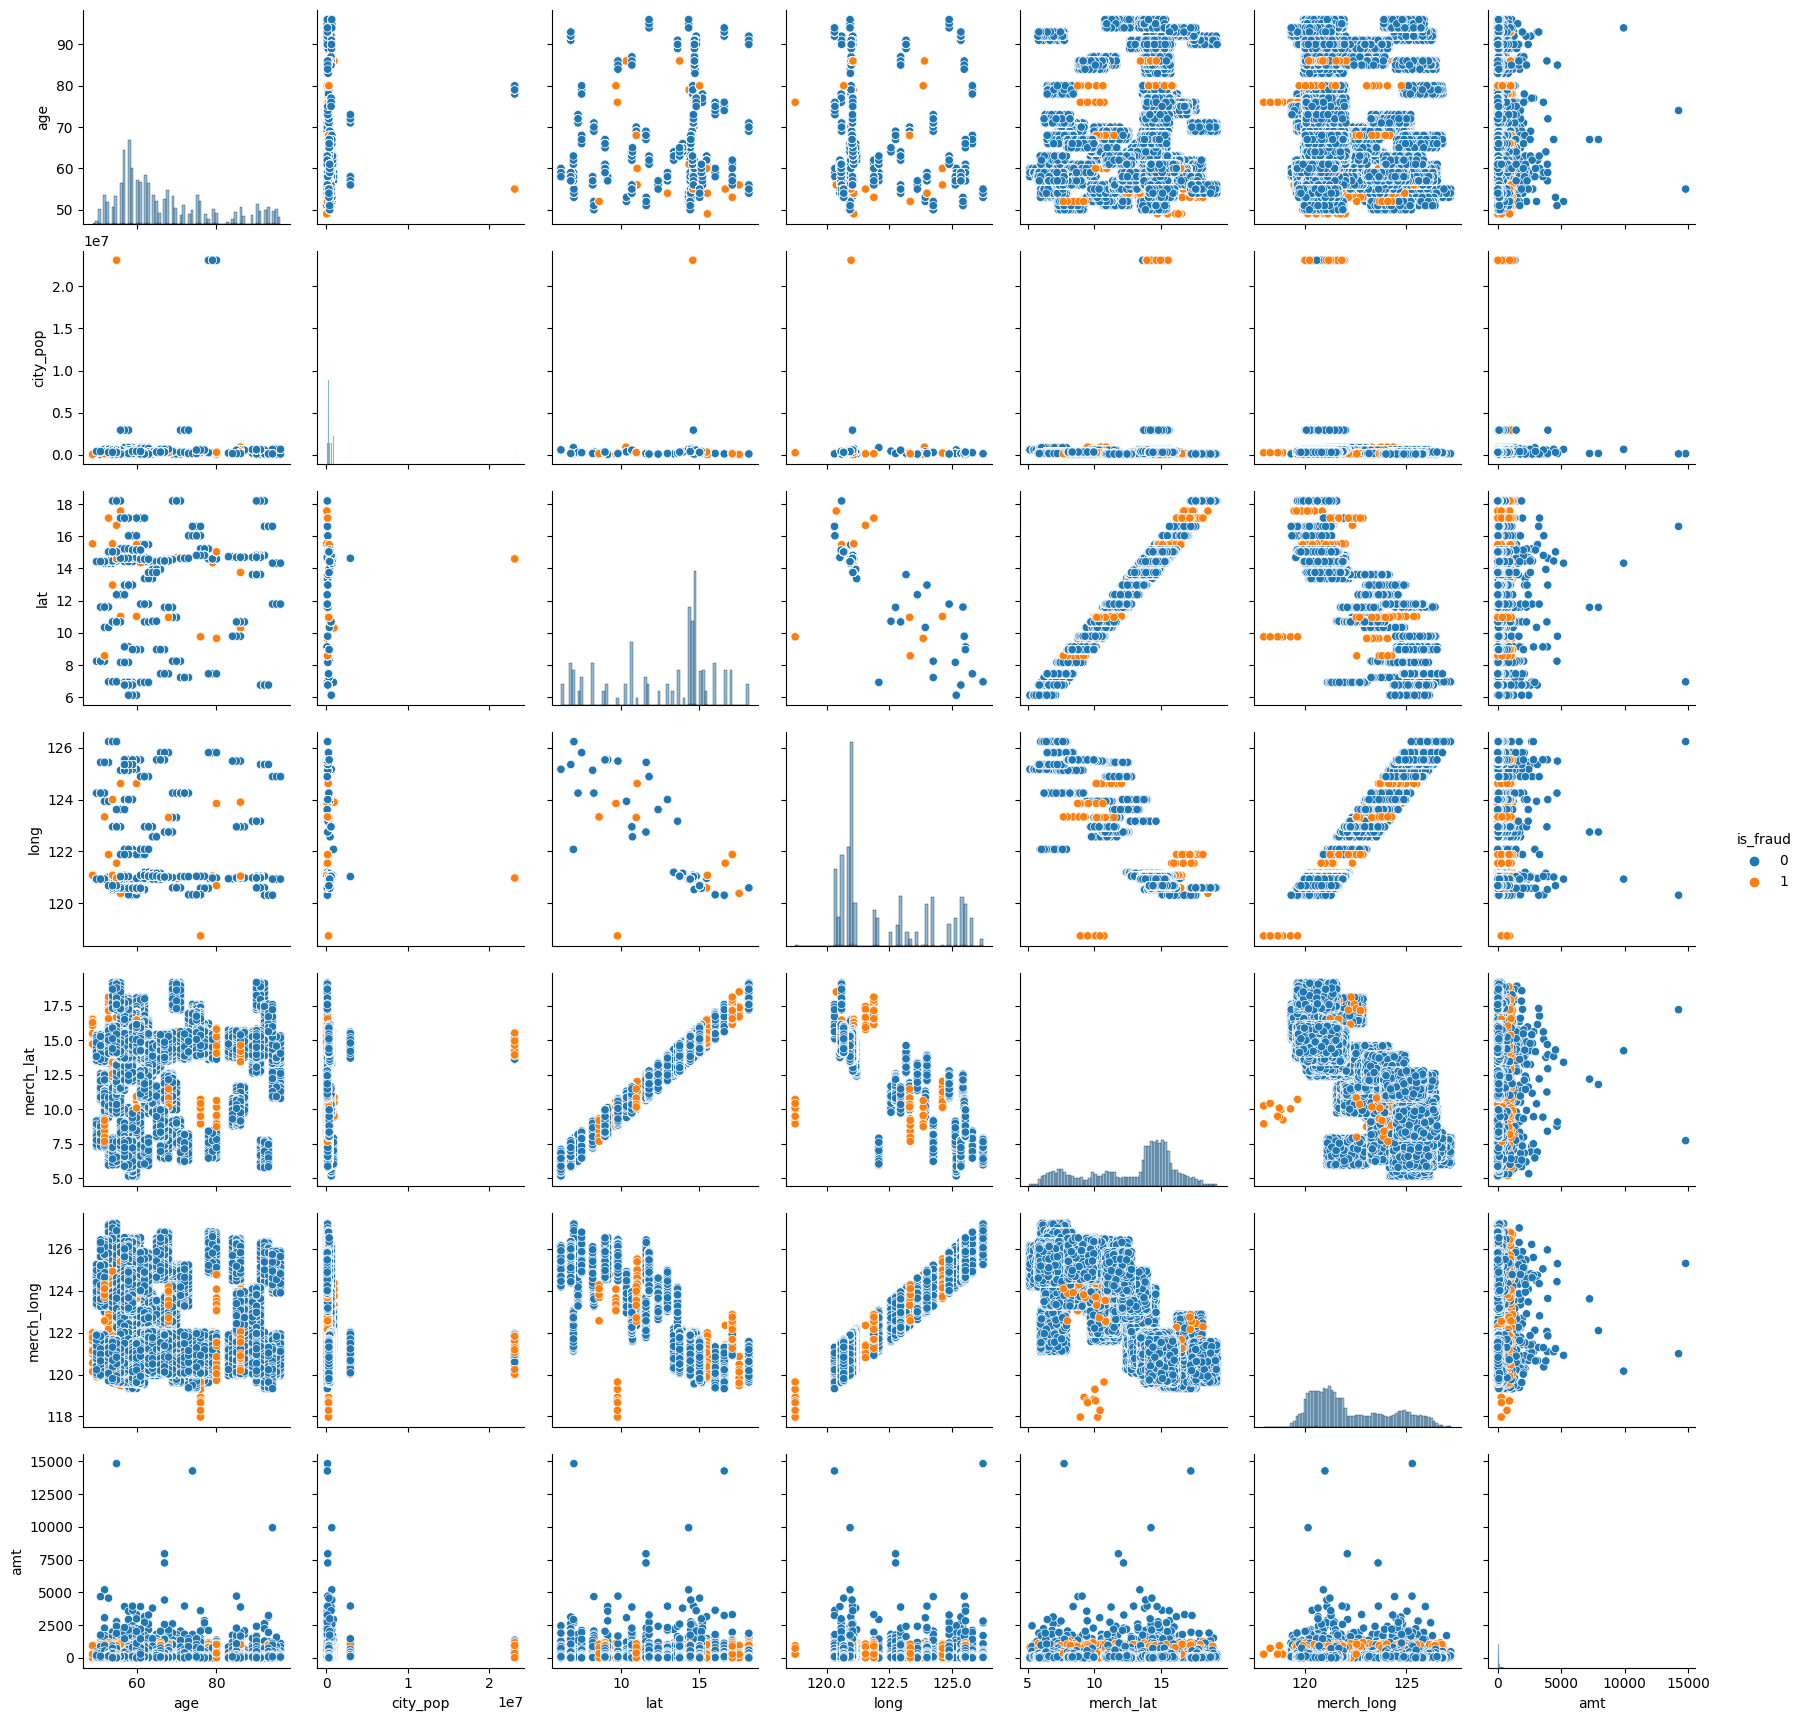

In [10]:
sns.pairplot(df[c_cols+["is_fraud"]], diag_kind="hist", hue="is_fraud")

## Univariate

In [11]:
%run "A1_EDA_Functions.ipynb"

Running Functions


### Credit Card Related
- Related to company/problem/usecase
    - is_fraud
    - Number of transactions
    - Transaction Amount

Running Functions


Text(0.5, 1.0, 'Amount (in thousands)')

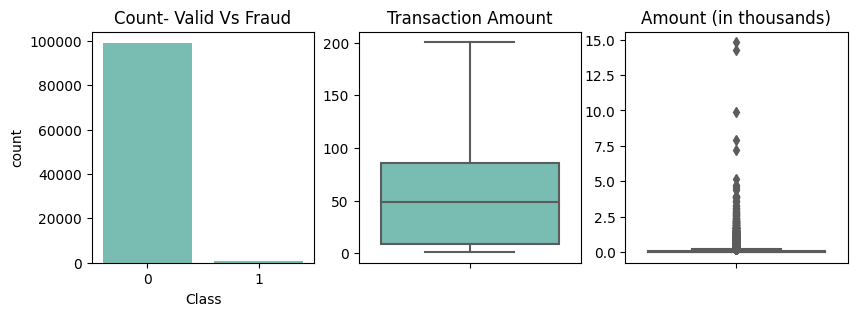

In [12]:
%run "A1_EDA_Functions.ipynb"
#data=plot_bar_vcl(df,"is_fraud","title",orient="x",figx=10,figy=3, dp=100, time_series=True)
#data

fig= plt.figure(figsize=(9.75,3),dpi=100)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

plot_bar_sp(df,"is_fraud","title",dmap="default",orient="x",ax=ax1)
sns.boxplot(ax=ax2, y=df["amt"], orient="v",showfliers = False,color='#6cc8ba')
sns.boxplot(ax=ax3, y=df["amt"]/1000, orient="v",showfliers = True,color='#6cc8ba')

ax2.yaxis.label.set_visible(False)
ax3.yaxis.label.set_visible(False)

ax1.set_title("Count- Valid Vs Fraud")
ax2.set_title("Transaction Amount")
ax3.set_title("Amount (in thousands)")


In [13]:
print("Proportion of Fraud Transactions-> {}%" .format(( len(df.query("is_fraud==1"))/len(df)*100)))

Proportion of Fraud Transactions-> 0.8789999999999999%


<AxesSubplot: xlabel='amt', ylabel='amt'>

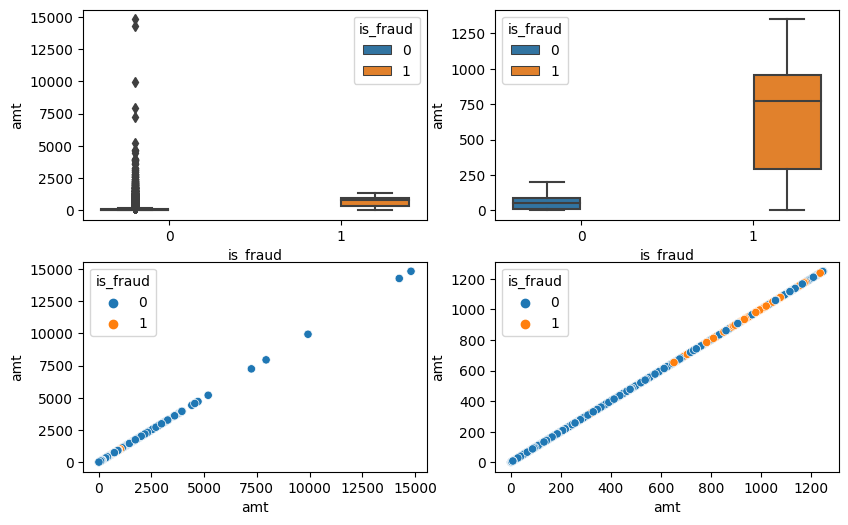

In [14]:
#%run "A1_EDA_Functions.ipynb"

fig= plt.figure(figsize=(9.75,6),dpi=100)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

#sns.boxplot(data=df, ax=ax1, y=df["amt"], hue="is_fraud", orient="v",showfliers = False,color='#6cc8ba')
sns.boxplot(data=df, ax=ax1, x="is_fraud",y=df["amt"], orient="v", hue="is_fraud",showfliers = True)
sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["amt"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')

sns.scatterplot(data=df, x="amt", y="amt", hue="is_fraud", ax=ax3)
sns.scatterplot(data=df.query("amt<1250"), x="amt", y="amt", hue="is_fraud", ax=ax4)


### Person Related

Running Functions


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


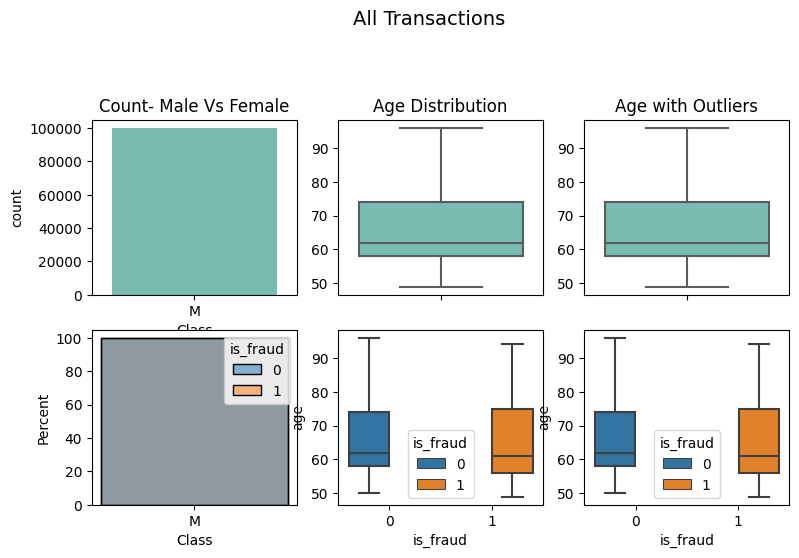

In [15]:
%run "A1_EDA_Functions.ipynb"
fig= plt.figure(figsize=(9,5),dpi=100)
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

df_f=df
plot_bar_sp(df_f,"gender","title",orient="x", clr='#6cc8ba',ax=ax1)
sns.boxplot(data=df, ax=ax2, y=df["age"], orient="v",showfliers = False,color='#6cc8ba')#,color='#6cc8ba')
sns.boxplot(data=df, ax=ax3, y=df["age"], orient="v",showfliers = True,color='#6cc8ba')#,color='#6cc8ba')

plot_bar_sp(df_f,"gender","title",orient="x", clr='#6cc8ba',hue="is_fraud",ax=ax4)
#sns.boxplot(ax=ax2, y=df_f["age"], orient="v",showfliers = False,color='#6cc8ba')
#sns.boxplot(ax=ax3, y=df_f["age"], orient="v",showfliers = True,color='#6cc8ba')
sns.boxplot(data=df, ax=ax5, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')
sns.boxplot(data=df, ax=ax6, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = True)#,color='#6cc8ba')


ax2.yaxis.label.set_visible(False)
ax3.yaxis.label.set_visible(False)

ax1.set_title("Count- Male Vs Female")
ax2.set_title("Age Distribution")
ax3.set_title("Age with Outliers")

fig.suptitle("All Transactions", fontsize=14,y=1.1)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)

In [16]:
# from wordcloud import WordCloud
# from nltk.corpus import stopwords

# words = []
# for phrase in df['job'].values:
#     for word in phrase.split():
#         words.append(word)
# jobs_list = ' '.join(words)

# stop_words = stopwords.words('english')
# stop_words = set(stop_words)

# wordcloud = WordCloud(background_color='white',
#                       collocations=False, contour_width=2,
#                      ).generate(jobs_list)
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off');

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ssn           100000 non-null  object        
 1   cc_num        100000 non-null  object        
 2   first         100000 non-null  object        
 3   last          100000 non-null  object        
 4   gender        100000 non-null  object        
 5   street        100000 non-null  object        
 6   city          100000 non-null  object        
 7   state         100000 non-null  object        
 8   zip           100000 non-null  int64         
 9   lat           100000 non-null  float64       
 10  long          100000 non-null  float64       
 11  city_pop      100000 non-null  int64         
 12  job           100000 non-null  object        
 13  dob           100000 non-null  object        
 14  acct_num      100000 non-null  object        
 15  trans_num     1000

### Location Related

Running Functions


<AxesSubplot: xlabel='merch_long', ylabel='merch_lat'>

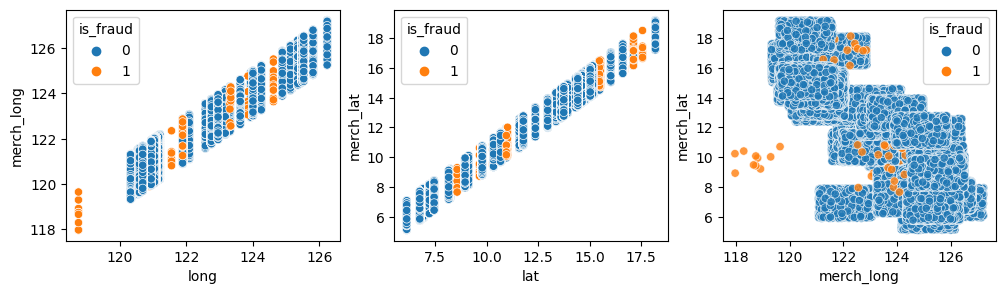

In [18]:
%run "A1_EDA_Functions.ipynb"
#data=plot_bar_vcl(df,"is_fraud","title",orient="x",figx=10,figy=3, dp=100, time_series=True)
#data

fig= plt.figure(figsize=(12,3),dpi=100)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)



sns.scatterplot(data=df, x="long", y="merch_long", hue="is_fraud", ax=ax1)
sns.scatterplot(data=df, x="lat", y="merch_lat", hue="is_fraud", ax=ax2)
sns.scatterplot(data=df, x="merch_long", y="merch_lat", hue="is_fraud", alpha=0.8,ax=ax3)

<AxesSubplot: xlabel='is_fraud', ylabel='merch_lat'>

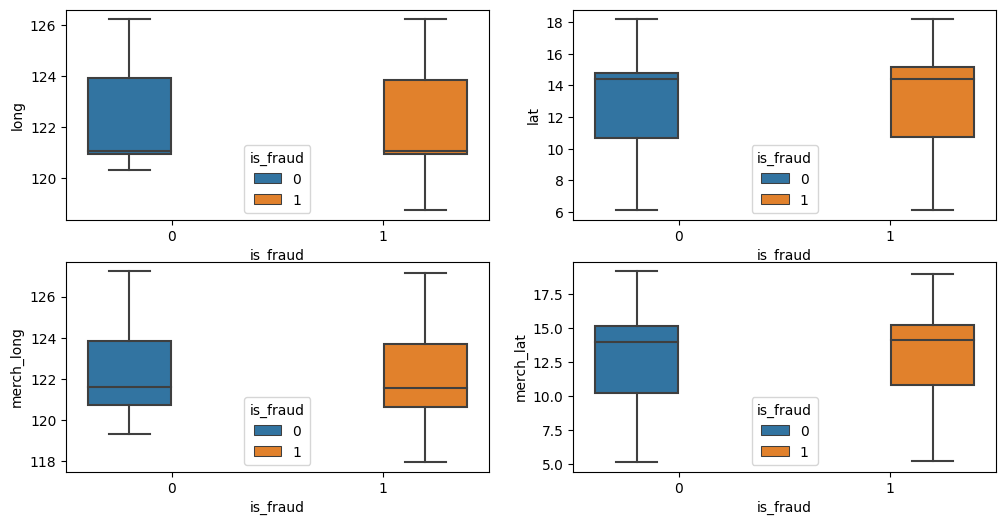

In [19]:
fig= plt.figure(figsize=(12,6),dpi=100)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.boxplot(data=df, ax=ax1, x="is_fraud",y=df["long"], orient="v", hue="is_fraud",showfliers = True)
sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["lat"], orient="v", hue="is_fraud",showfliers = True)

sns.boxplot(data=df, ax=ax3, x="is_fraud",y=df["merch_long"], orient="v", hue="is_fraud",showfliers = True)
sns.boxplot(data=df, ax=ax4, x="is_fraud",y=df["merch_lat"], orient="v", hue="is_fraud",showfliers = True)
#sns.scatterplot(data=df, x="long", y="merch_long", hue="is_fraud", ax=ax1)
#sns.scatterplot(data=df, x="lat", y="merch_lat", hue="is_fraud", ax=ax2)

In [20]:
# Build the bubble map
'''

data=df#.head(100)

import plotly.express as px
fig = px.scatter_geo(
    data, lat="merch_lat", lon="merch_long", hover_name="city",color="is_fraud",color_continuous_scale='tropic'
    )
fig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})

# Show the figure
fig.show()

'''

'\n\ndata=df#.head(100)\n\nimport plotly.express as px\nfig = px.scatter_geo(\n    data, lat="merch_lat", lon="merch_long", hover_name="city",color="is_fraud",color_continuous_scale=\'tropic\'\n    )\nfig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})\n\n# Show the figure\nfig.show()\n\n'

<img src="geospatial.gif" width=300>

### Transaction Time

#### Year

Running Functions


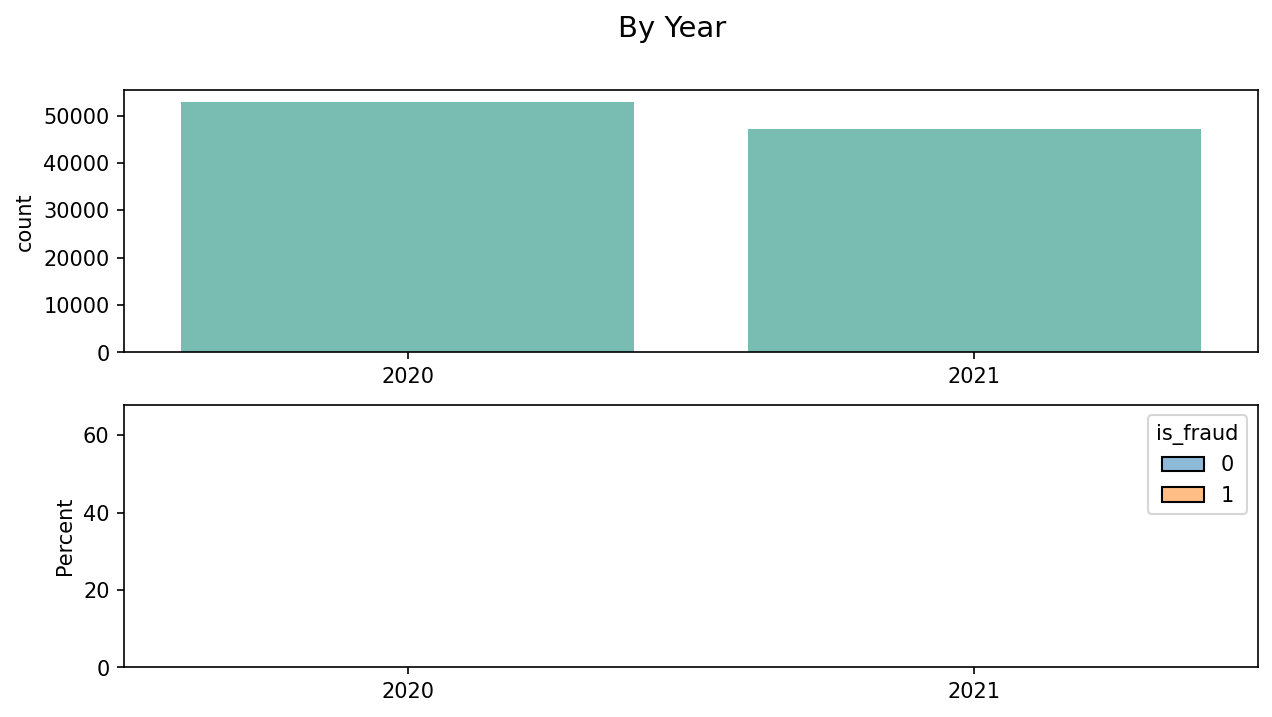

In [21]:
%run "A1_EDA_Functions.ipynb"

fig= plt.figure(figsize=(9.75,5),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.tight_layout()
#ax3 = fig.add_subplot(133)

plot_bar_sp(df,"trans_year","title",orient="x", time_series=True, clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df,"trans_year","title",orient="x", hue="is_fraud", time_series=True, clr='#6cc8ba',ax=ax2)

#sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')
#sns.boxplot(data=df, ax=ax3, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = True)#,color='#6cc8ba')
#sns.boxplot(ax=ax2, y=df["age"], orient="v",showfliers = False,color='#6cc8ba')
#sns.boxplot(ax=ax3, y=df["age"], orient="v",showfliers = True,color='#6cc8ba')

#ax2.yaxis.label.set_visible(False)
#ax3.yaxis.label.set_visible(False)

#ax1.set_title("Count- Male Vs Female")
#ax2.set_title("")
ax2.sharex(ax1)
#ax2.set_title("Age Distribution")
#ax3.set_title("Age with Outliers")

fig.suptitle("By Year", fontsize=14)

ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)

In [22]:
df.query("is_fraud==1")['trans_year'].value_counts(normalize=True)

2020    0.646189
2021    0.353811
Name: trans_year, dtype: float64

#### Month

In [23]:
df.trans_month.value_counts(normalize=True)*100

5     9.410
8     9.335
7     9.240
6     9.202
3     8.674
11    8.307
10    8.200
4     8.191
12    8.139
9     7.572
1     6.964
2     6.766
Name: trans_month, dtype: float64

Running Functions


Text(0.5, 0.98, 'All Transactions')

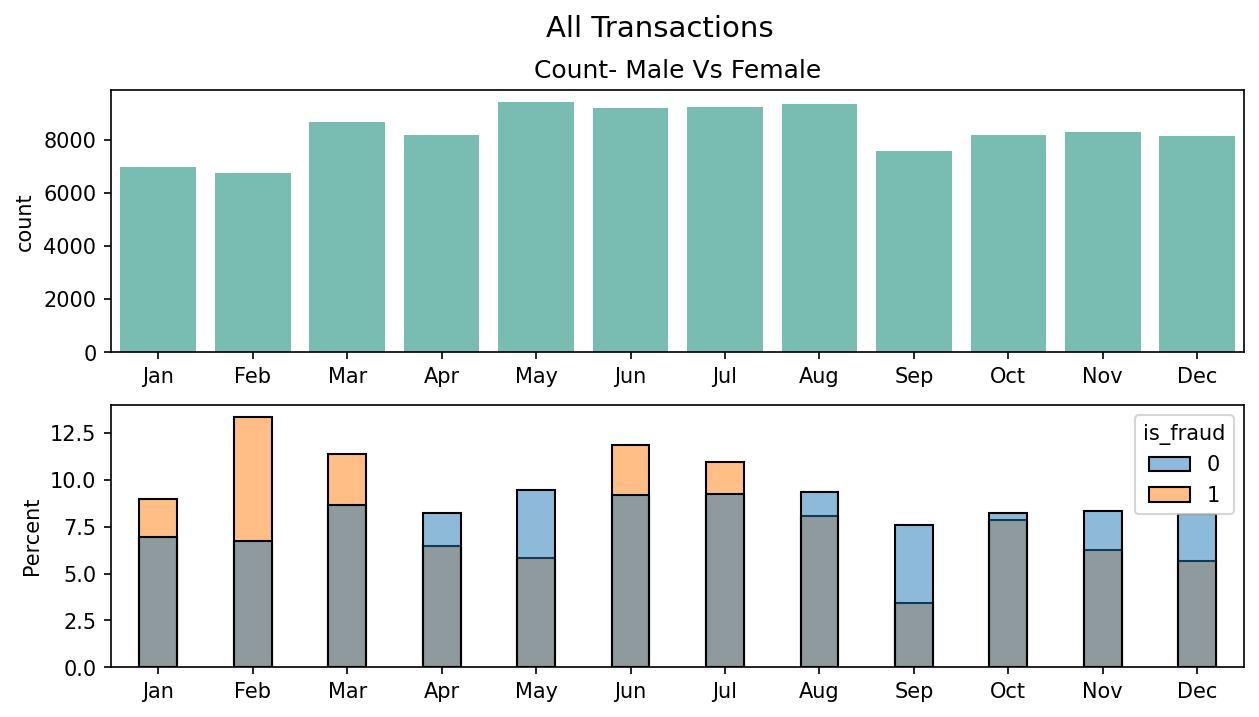

In [24]:
%run "A1_EDA_Functions.ipynb"

fig= plt.figure(figsize=(9.75,5),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.tight_layout()
#ax3 = fig.add_subplot(133)

plot_bar_sp(df,"trans_month_","title",orient="x", time_series=True,month_data=True, clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df,"trans_month_","title",orient="x",hue="is_fraud", time_series=True,month_data=True, clr='#6cc8ba',ax=ax2)

#sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')
#sns.boxplot(data=df, ax=ax3, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = True)#,color='#6cc8ba')
#sns.boxplot(ax=ax2, y=df["age"], orient="v",showfliers = False,color='#6cc8ba')
#sns.boxplot(ax=ax3, y=df["age"], orient="v",showfliers = True,color='#6cc8ba')

#ax2.yaxis.label.set_visible(False)
#ax3.yaxis.label.set_visible(False)

ax1.set_title("Count- Male Vs Female")
ax2.set_title("")
ax2.sharex(ax1)
#ax2.set_title("Age Distribution")
#ax3.set_title("Age with Outliers")
ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)
fig.suptitle("All Transactions", fontsize=14)


#### Day

Running Functions


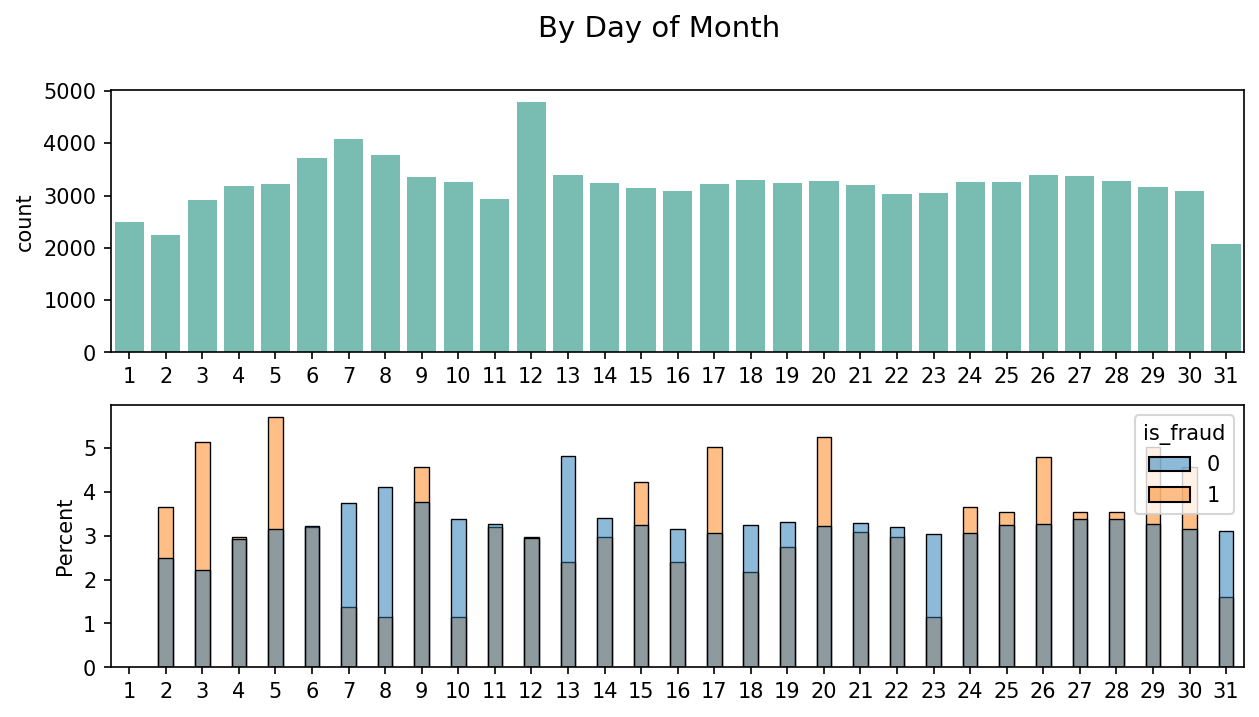

In [25]:
%run "A1_EDA_Functions.ipynb"

fig= plt.figure(figsize=(9.75,5),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.tight_layout()
#ax3 = fig.add_subplot(133)

plot_bar_sp(df,"trans_day","title",orient="x", time_series=True, clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df,"trans_day","title",orient="x",hue="is_fraud", time_series=True, clr='#6cc8ba',ax=ax2)

#sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')
#sns.boxplot(data=df, ax=ax3, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = True)#,color='#6cc8ba')
#sns.boxplot(ax=ax2, y=df["age"], orient="v",showfliers = False,color='#6cc8ba')
#sns.boxplot(ax=ax3, y=df["age"], orient="v",showfliers = True,color='#6cc8ba')

#ax2.yaxis.label.set_visible(False)
#ax3.yaxis.label.set_visible(False)

#ax1.set_title("Count- Male Vs Female")
#ax2.set_title("")
ax2.sharex(ax1)
#ax2.set_title("Age Distribution")
#ax3.set_title("Age with Outliers")

fig.suptitle("By Day of Month", fontsize=14)

ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)

#### Part of Day

Running Functions


Text(0.5, 0.98, 'Part of Day')

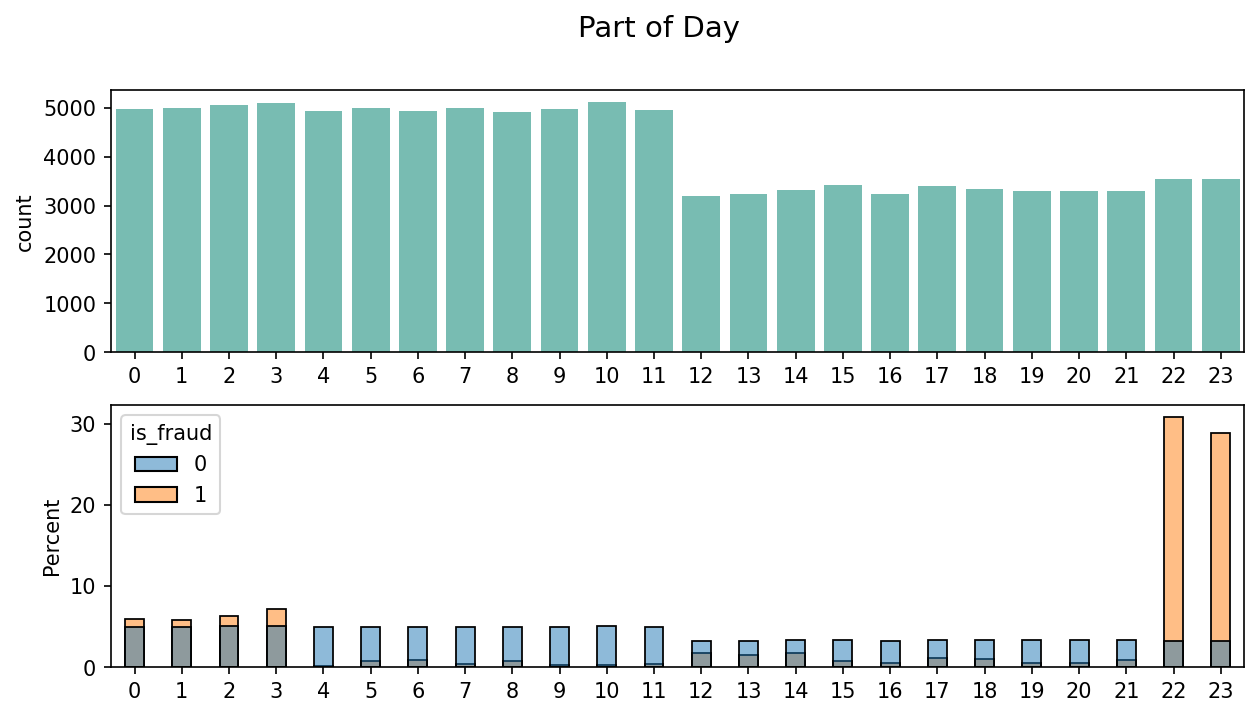

In [26]:
%run "A1_EDA_Functions.ipynb"

fig= plt.figure(figsize=(9.75,5),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.tight_layout()
#ax3 = fig.add_subplot(133)

plot_bar_sp(df,"trans_hour","title",orient="x", time_series=True,  clr='#6cc8ba',ax=ax1,)
plot_bar_sp(df,"trans_hour","title",orient="x",hue="is_fraud", time_series=True,clr='#6cc8ba',ax=ax2)

#sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')
#sns.boxplot(data=df, ax=ax3, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = True)#,color='#6cc8ba')
#sns.boxplot(ax=ax2, y=df["age"], orient="v",showfliers = False,color='#6cc8ba')
#sns.boxplot(ax=ax3, y=df["age"], orient="v",showfliers = True,color='#6cc8ba')

#ax2.yaxis.label.set_visible(False)
#ax3.yaxis.label.set_visible(False)

ax1.set_title("")
ax2.set_title("")
ax2.sharex(ax1)
#ax2.set_title("Age Distribution")
#ax3.set_title("Age with Outliers")
ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)
fig.suptitle("Part of Day", fontsize=14)
#fig.tight_layout()

In [27]:
# %run "A1_EDA_Functions.ipynb"

# fig= plt.figure(figsize=(9.75,5),dpi=150)
# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)
# #plt.tight_layout()
# #ax3 = fig.add_subplot(133)

# plot_bar_sp(df,"trans_minute","title",orient="x", time_series=True,  clr='#6cc8ba',ax=ax1,)
# plot_bar_sp(df,"trans_minute","title",orient="x",hue="is_fraud", time_series=True,clr='#6cc8ba',ax=ax2)

# #sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')
# #sns.boxplot(data=df, ax=ax3, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = True)#,color='#6cc8ba')
# #sns.boxplot(ax=ax2, y=df["age"], orient="v",showfliers = False,color='#6cc8ba')
# #sns.boxplot(ax=ax3, y=df["age"], orient="v",showfliers = True,color='#6cc8ba')

# #ax2.yaxis.label.set_visible(False)
# #ax3.yaxis.label.set_visible(False)

# ax1.set_title("")
# ax2.set_title("")
# ax2.sharex(ax1)
# #ax2.set_title("Age Distribution")
# #ax3.set_title("Age with Outliers")
# ax1.xaxis.label.set_visible(False)
# ax2.xaxis.label.set_visible(False)
# fig.suptitle("Part of Day", fontsize=14)
# #fig.tight_layout()

### Category of Transaction

Running Functions


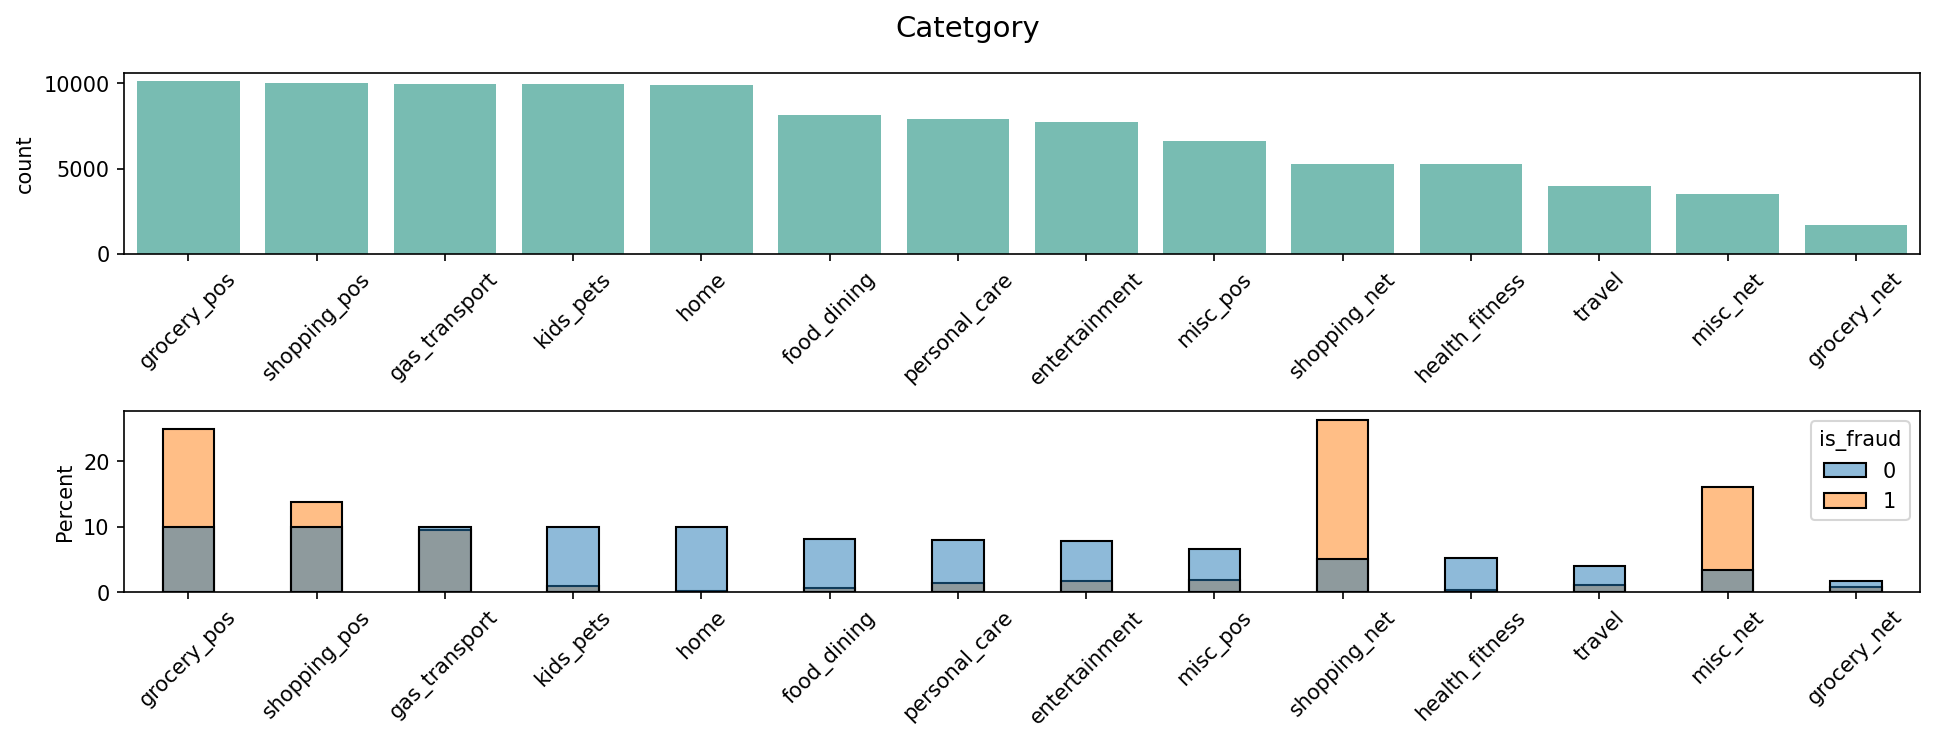

In [28]:
%run "A1_EDA_Functions.ipynb"

fig= plt.figure(figsize=(13,5),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.tight_layout()
#ax3 = fig.add_subplot(133)

plot_bar_sp(df,"category","title",orient="x", clr='#6cc8ba',ax=ax1,limited=False)
plot_bar_sp(df,"category","title",orient="x",hue="is_fraud",clr='#6cc8ba',ax=ax2)

#sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')
#sns.boxplot(data=df, ax=ax3, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = True)#,color='#6cc8ba')
#sns.boxplot(ax=ax2, y=df["age"], orient="v",showfliers = False,color='#6cc8ba')
#sns.boxplot(ax=ax3, y=df["age"], orient="v",showfliers = True,color='#6cc8ba')

#ax2.yaxis.label.set_visible(False)
#ax3.yaxis.label.set_visible(False)

ax1.set_title("")
ax2.set_title("")
ax2.sharex(ax1)
#ax2.set_title("Age Distribution")
#ax3.set_title("Age with Outliers")
ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45)
fig.suptitle("Catetgory", fontsize=14)
fig.tight_layout()

### Merchant Related

Running Functions


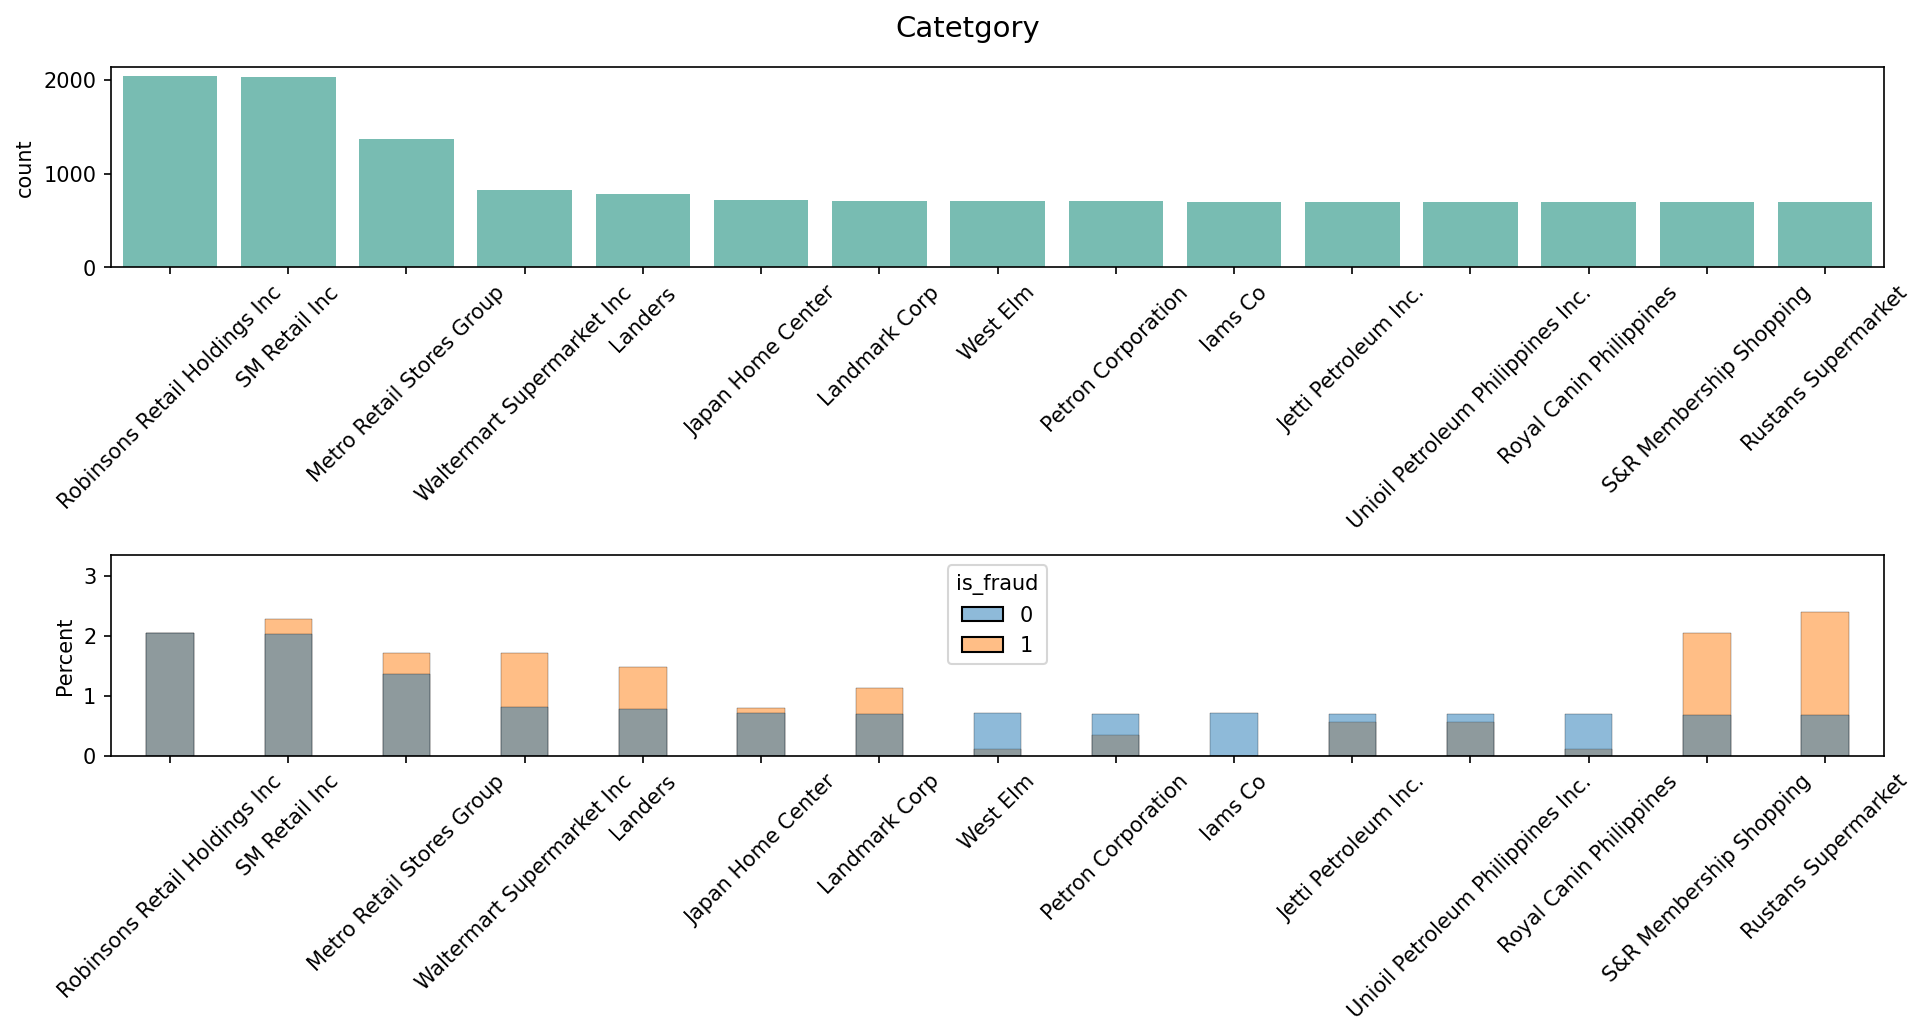

In [29]:
%run "A1_EDA_Functions.ipynb"

fig= plt.figure(figsize=(13,7),dpi=150)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.tight_layout()
#ax3 = fig.add_subplot(133)

plot_bar_sp(df,"merchant","title",orient="x", clr='#6cc8ba',ax=ax1,limited=15)
plot_bar_sp(df,"merchant","title",orient="x",hue="is_fraud",clr='#6cc8ba',ax=ax2)

#sns.boxplot(data=df, ax=ax2, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = False)#,color='#6cc8ba')
#sns.boxplot(data=df, ax=ax3, x="is_fraud",y=df["age"], orient="v", hue="is_fraud",showfliers = True)#,color='#6cc8ba')
#sns.boxplot(ax=ax2, y=df["age"], orient="v",showfliers = False,color='#6cc8ba')
#sns.boxplot(ax=ax3, y=df["age"], orient="v",showfliers = True,color='#6cc8ba')

#ax2.yaxis.label.set_visible(False)
#ax3.yaxis.label.set_visible(False)

ax1.set_title("")
ax2.set_title("")
ax2.sharex(ax1)
#ax2.set_title("Age Distribution")
#ax3.set_title("Age with Outliers")
ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)
#ax1.xlim([0:10])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45)
#ax2.set_xticklabels(df.category.unique().tolist(), rotation=45)
fig.suptitle("Catetgory", fontsize=14)

#print(ax1.get_xticklabels())
fig.tight_layout()

In [30]:
data1=df.query("is_fraud==1").merchant.value_counts().to_frame()
data1["P1"]=data1.merchant/data1.merchant.sum()

data2=df.query("is_fraud==0").merchant.value_counts().to_frame()
data2["P2"]=data2.merchant/data2.merchant.sum()
data=pd.concat([data1,data2],axis=1)[["P1","P2"]]
data["D"]=data.P1-data.P2
data.sort_values(by="D", inplace=True,ascending=False)
o=data.index.values.tolist()
#data.reset_index().head(10)
data_b=data.reset_index().rename(columns={"index":'bar'})
data_b

,bar,P1,P2,D
0,Lazada,0.031854,0.004409,0.027446
1,MedStoreRx,0.023891,0.002230,0.021661
2,O Shopping,0.021615,0.003370,0.018246
3,Rustans Supermarket,0.023891,0.006820,0.017071
4,MetroDeal,0.020478,0.003481,0.016997
...,...,...,...,...
196,Growcery MNL,NaN,0.001150,NaN
197,Limon Farms,NaN,0.001039,NaN
198,Zagana,NaN,0.001029,NaN
199,Savvys,NaN,0.001019,NaN


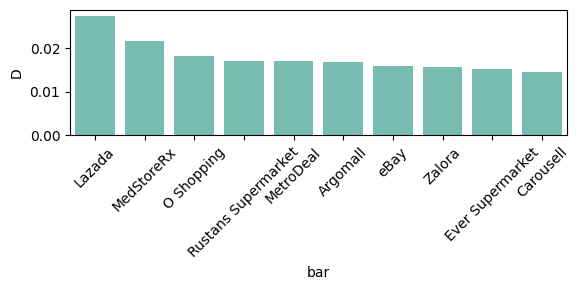

In [31]:
fig= plt.figure(figsize=(6,3),dpi=100)
ax1 = fig.add_subplot(111)

data_df=df.copy()
data_df["Class"] = pd.Categorical(data_df['merchant'], o[:10])
#data.plot.bar(y="D")
sns.barplot(data=data_b,x="bar", y="D",ax=ax1, order=o[:10],color='#6cc8ba')
#sns.histplot(data_df, x="Class", ax=ax1, stat="percent",multiple="layer", shrink=.4,common_norm=False)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
fig.tight_layout()